In [1]:
pip list

Package                            Version
---------------------------------- --------------------
alabaster                          0.7.12
anaconda-client                    1.9.0
anaconda-navigator                 2.1.2
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
arrow                              0.13.1
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.7
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



future                             0.18.2
gevent                             21.8.0
glob2                              0.7
greenlet                           1.1.1
h5py                               3.2.1
HeapDict                           1.0.1
html5lib                           1.1
idna                               3.2
imagecodecs                        2021.8.26
imageio                            2.9.0
imagesize                          1.2.0
importlib-metadata                 4.8.1
inflection                         0.5.1
iniconfig                          1.1.1
intervaltree                       3.1.0
ipykernel                          6.4.1
ipython                            7.29.0
ipython-genutils                   0.2.0
ipywidgets                         7.6.5
isort                              5.9.3
itsdangerous                       2.0.1
Janome                             0.4.2
japanmap                           0.1.0
jdcal                              1.4.1
jedi          

In [3]:
pip show numpy

Name: numpy
Version: 1.24.3
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: c:\users\takahiro\anaconda3\lib\site-packages
Requires: 
Required-by: astropy, bkcharts, bokeh, Bottleneck, daal4py, h5py, imagecodecs, imageio, japanmap, matplotlib, mkl-fft, mkl-random, numba, numexpr, opencv-python, pandas, patsy, pyerfa, PyWavelets, scikit-image, scikit-learn, scipy, seaborn, statsmodels, tables, tifffile
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip show pandas

Name: pandas
Version: 1.3.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\users\takahiro\anaconda3\lib\site-packages
Requires: numpy, python-dateutil, pytz
Required-by: seaborn, statsmodels
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip show japanmap

Name: japanmap
Version: 0.1.0
Summary: `japanmap` is a package for Japanese map.
Home-page: https://github.com/SaitoTsutomu/japanmap
Author: SaitoTsutomu
Author-email: tsutomu7@hotmail.co.jp
License: MIT
Location: c:\users\takahiro\anaconda3\lib\site-packages
Requires: numpy, opencv-python, Pillow
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [79]:
import pandas as pd

In [80]:
produce = './zikyu.csv'
calorie = './zikyu_calorie.csv'

df = pd.read_csv(calorie, encoding='utf-8', skiprows=5)

print(df)

    全　国   40  40.1  40.2  40.3  40.4  40.5  40.6  40.7   39  ...  39.2  39.3  \
0   北海道  192   178   176   183   190   192   200   201  195  ...   191   200   
1   青　森  118   121   117   118   115    84   117   116  118  ...   112   118   
2   岩　手  101   106   103   101   102    86   106   103  105  ...   103   105   
3   宮　城   80    81    81    81    81    64    84    79   79  ...    69    72   
4   秋　田  163   163   157   158   158   167   141   164  175  ...   178   177   
5   山　形  129   129   128   129   128   131   122   128  133  ...   132   133   
6   福　島   76    81    79    82    82    79    85    82   84  ...    72    72   
7   茨　城   66    71    72    70    72    72    72    72   71  ...    70    72   
8   栃　木   68    74    76    75    77    76    81    75   72  ...    75    72   
9   群　馬   34    34    34    33    34    35    34    34   34  ...    33    34   
10  埼　玉   12    12    12    12    12    12    12    11   11  ...    11    11   
11  千　葉   30    30    30    29    29    

In [130]:
def printObject(myObj):
    for prefecture in myObj:
        print(str(prefecture['prefecture']) + ' ' + str(prefecture['food_self_sufficiency']))

# iterrows()で行ごとの処理
all_ave = []
for index, row in df.iterrows():
    food_self_sufficiency = 0
    for item in row:
        if type(item) is not str:
            food_self_sufficiency += item;
    food_self_sufficiency /= len(row) - 5
    prefecture_info = {}
    prefecture_info['prefecture'] = row[0]
    prefecture_info['food_self_sufficiency'] = food_self_sufficiency
    all_ave.append(prefecture_info)
# printObject(all_ave)
all_ave = sorted(all_ave, key=lambda prefecture: prefecture['food_self_sufficiency'], reverse=True)
# printObject(all_ave)

#ここを変えるだけで，表示するデータは変えられるよ．
selected_row = all_ave[0:len(all_ave)]


sorted_data = []
printObject(selected_row)
for item in selected_row:
    now = item['prefecture']
    for index, row in df.iterrows():
        temp = []
        flag = False
        for data in row:
            if type(data) is str:
                if data == now:
                    flag = True
                    temp = []
            elif (flag):
                temp.append(data)
        if len(temp) > 0:
            sorted_data.append({
                'name' : now,
                'data' : temp
            })
for data in sorted_data:
    print(data['name'] + str(data['data']))
    

北海道 237.73684210526315
秋　田 212.8421052631579
山　形 162.05263157894737
青　森 142.42105263157896
岩　手 126.26315789473684
新　潟 121.73684210526316
佐　賀 111.52631578947368
鹿児島 101.10526315789474
福　島 96.52631578947368
宮　城 92.15789473684211
富　山 91.73684210526316
栃　木 88.89473684210526
茨　城 85.6842105263158
福　井 79.15789473684211
島　根 78.15789473684211
宮　崎 76.26315789473684
鳥　取 74.42105263157895
熊　本 71.36842105263158
長　野 63.78947368421053
滋　賀 61.578947368421055
大　分 59.21052631578947
石　川 58.73684210526316
高　知 56.63157894736842
徳　島 54.0
長　崎 52.1578947368421
三　重 50.94736842105263
愛　媛 46.63157894736842
岡　山 46.21052631578947
香　川 43.73684210526316
群　馬 40.31578947368421
山　口 39.21052631578947
沖　縄 38.31578947368421
和歌山 35.78947368421053
千　葉 34.21052631578947
岐　阜 30.68421052631579
広　島 28.36842105263158
福　岡 24.94736842105263
山　梨 24.05263157894737
静　岡 20.94736842105263
兵　庫 19.57894736842105
奈　良 17.63157894736842
愛　知 15.473684210526315
京　都 15.157894736842104
埼　玉 13.31578947368421
神奈川 3.0526315789473686
大　阪 2.15789473

In [131]:
import matplotlib.pyplot as plt

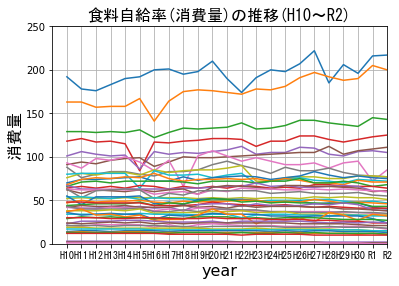

In [133]:
years = [('H' + str(i)) for i in range(10, 31)]
years.append('R1')
years.append('R2')
x_datas = range(1, len(years) + 1)

for data in sorted_data:
    plt.plot(x_datas, data['data'], label=data['name'])

plt.xticks(x_datas, years, fontname="MS Gothic", fontsize=5)
plt.xlim(0, len(x_datas))
plt.ylim(0, 250)

plt.title('食料自給率(消費量)の推移(H10～R2)', fontsize=16, fontname="MS Gothic")
plt.xlabel('year', fontsize=16)
plt.ylabel('消費量', fontsize=16, fontname="MS Gothic")
plt.tick_params(labelsize=10)
plt.grid(True)
#plt.legend(prop={"family":"MS Gothic"})
plt.show()

